#**1. Preprocessing**

##**1.1 Import thư viện cần thiết:**



In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import imutils
import numpy as np

##**1.2 Tiền xử lí ảnh:**

In [ ]:
%cd '/content/drive/My Drive/ML/Picture'

/content/drive/My Drive/ML/Picture


####**Show Image:**

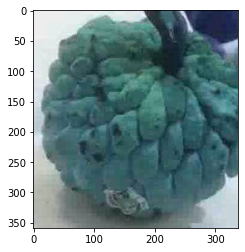

In [ ]:
image = cv2.imread("picture_2.jpg")
#cv2.cvtColor(ImgTest,cv2.COLOR_BGR2RGB)
plt.imshow(image)

###**1.1.1 Convert to Grayscale Image:**


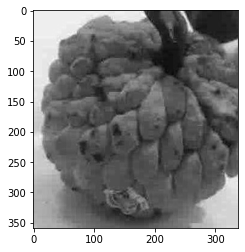

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

###**1.2.2 Resize:**

+ Thông thường, **resize** một bức ảnh thường chúng ta không quan tâm đến tỉ số giữa chiều dài và chiều rộng (**aspect ratio**) của bức ảnh, điều này sẽ dẫn đến bức ảnh sau khi **resize** có thể bị méo mó.
> + Ví dụ: 
>
><img src="https://drive.google.com/uc?id=1ts-eOvSbIlONzKxxXkiBRGPz8GSBOS2X
" alt="Compare" class="center" width=500/>
>
> Đối với hình ở giữa (**Ingore Aspect ratio**) thì khi resize lại thì ảnh sẽ bị kéo dài ra hai bên, còn hình bên tay phải (**Consider Aspect ratio**) có hình dáng gần giống với ảnh gốc hơn. 

####**Resize ignore aspect ratio:**

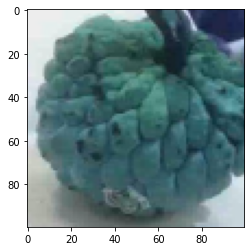

In [ ]:
image_ignore = cv2.resize(image,(100,100), interpolation=cv2.INTER_AREA)
plt.imshow(image_ignore)

####**Resize aspect ratio:**

In [ ]:
def resize_ratio(img, width = 100, height = 100, inter = cv2.INTER_AREA):
    # get size of image
    (h,w) = img.shape[:2]
    dW = 0
    dH = 0
    if w < h:
        img = imutils.resize(img,width=width,inter=inter)
        dH = int((img.shape[0] - height)/2.0)
    else:
        img = imutils.resize(img,height=height,inter=inter)
        dW = int((img.shape[1] - width)/2.0)

    (h,w) = img.shape[:2]
    img = img[dH:h - dH,dW:w - dW]

    return cv2.resize(img,(width,height),interpolation=inter)


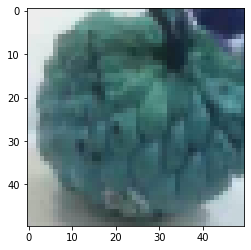

In [ ]:
imgage_ratio = resize_ratio(image)
plt.imshow(imgage_ratio)

###**1.2.3 Làm mịn ảnh (Medianblur):**

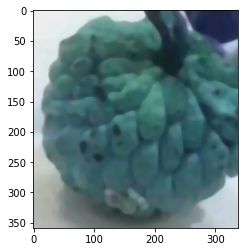

In [ ]:
img_blur = cv2.medianBlur(image,9)
plt.imshow(img_blur)

##**1.3 Ghi vào file .py:**


In [4]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final/preprocessing'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final/preprocessing


In [9]:
%%writefile simplepreprocessor.py
import cv2
import imutils

class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height, interpolation 
        # method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
    
    def preprocess(self, image):
     
        # grab the dimesions of the image and then initialize
        # the deltas to use when cropping
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0

        # if the width is smller than the height,so resize
        # along the width and then update the deltas 
        # to crop the height to the desired demension
        if w < h:
            image =imutils.resize(image, width=self.width, inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)

        # otherwise, the height is smaller than the width so 
        # resize along the height and then update the deltas 
        # to crop along the width
        else:
            image = imutils.resize(image, height=self.height, inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)

        # now that our images have been resized, we need to 
        # re-grab the width and height, followed by performing
        # the crop
        (h,w) = image.shape[:2]
        image = image[dH:h -dH, dW:w-dW]

        # finally, resize the image to the provided spatial
        # demensions to ensure ourput image is slways a fixed
        # size
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)


Overwriting simplepreprocessor.py


In [ ]:
%%writefile imagetoarraypreprocessor.py
# import the necessary packages
from keras.preprocessing.image import img_to_array

class ImageToArrayPreprocessor:
    def __init__(self, dataFormat=None):
        # store the image data format
        self.dataFormat = dataFormat

    def preprocess(self, image):
        # apply the Keras utility function that correctly rearranges
        # the dimensions of the image
        return img_to_array(image, data_format=self.dataFormat)

Overwriting imagetoarraypreprocessor.py


In [8]:
%%writefile __init__.py
from .simplepreprocessor import *

Overwriting __init__.py
